In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sn

In [2]:
# Load the train and test digits datasets in their respective variables
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
# Each sample is a 28x28 image
X_train[0].shape

(28, 28)

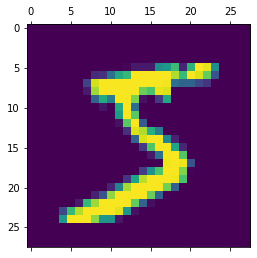

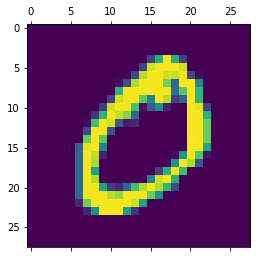

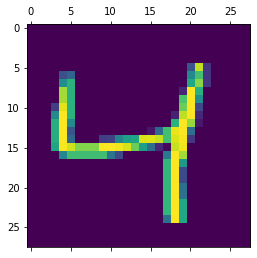

In [6]:
# Train test's first 3 images
for i in range(0, 3):
    plt.matshow(X_train[i])

In [7]:
y_train[:3]

array([5, 0, 4], dtype=uint8)

### We're going to flatten our training dataset because we need to convert the 28x28 images into an 1D array.

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
# Scaling our dataset in an attempt to increase accuracy. Current range is 0-255
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape

(60000, 784)

In [11]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

## We start building our Neural Network

In [12]:
# Dense = All neurons in the 1st layer (input) are connected with all neurons in the 2nd layer (output).
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid') # (output, input, activation)
])

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4651 - accuracy: 0.8798
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3037 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2829 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9230
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9255


In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2696 - accuracy: 0.9252


[0.26963260769844055, 0.9251999855041504]

In [15]:
y_predictions = model.predict(X_test_flattened)
y_predictions[1]  # Show the 10 outputs of our prediction for the first number (7)

array([6.7569977e-01, 4.5127869e-03, 9.9948639e-01, 4.1681480e-01,
       7.3795398e-10, 9.0865064e-01, 8.8232571e-01, 7.7216228e-13,
       1.9910479e-01, 3.3143972e-09], dtype=float32)

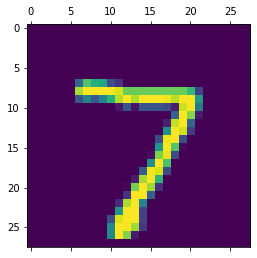

In [16]:
plt.matshow(X_test[0])

In [17]:
# Our prediction is the max value of the array above. Display it:
np.argmax(y_predictions[0])

7

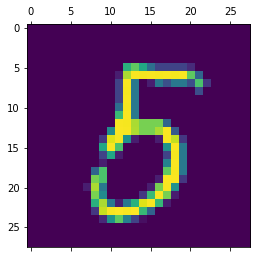

In [18]:
plt.matshow(X_test[45])

In [19]:
np.argmax(y_predictions[45])

5

## Confusion Matrix

In [20]:
y_predictions_labels = [np.argmax(i) for i in y_predictions]
y_predictions_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predictions_labels)

Text(69.0, 0.5, 'Truth')

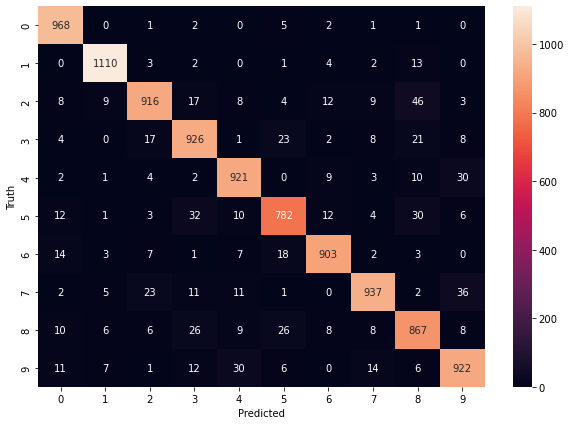

In [22]:
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Adding a hidden layer to improve performance

In [23]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), # Middle (hidden) layer
    keras.layers.Dense(10, activation='sigmoid') # Output layer
])

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2743 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1225 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0846 - accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0652 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0523 - accuracy: 0.9839


In [25]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0801 - accuracy: 0.9751


[0.08010134845972061, 0.9750999808311462]

Text(69.0, 0.5, 'Truth')

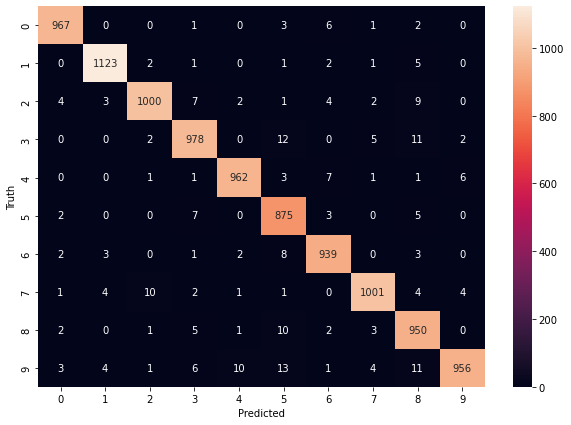

In [26]:
y_predictions = model.predict(X_test_flattened)
y_predictions_labels = [np.argmax(i) for i in y_predictions]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predictions_labels)
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Instead of creating variables for the flattened values, we can instead flatten the Train/Test sets via Keras.

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), # Middle (hidden) layer
    keras.layers.Dense(10, activation='sigmoid') # Output layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2724 - accuracy: 0.9227
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1253 - accuracy: 0.9630
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0872 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0670 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0525 - accuracy: 0.9837


In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0813 - accuracy: 0.9746


[0.08132531493902206, 0.9746000170707703]

Text(69.0, 0.5, 'Truth')

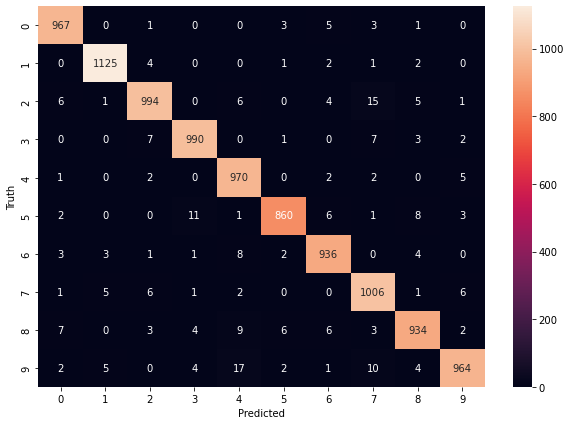

In [29]:
y_predictions = model.predict(X_test)
y_predictions_labels = [np.argmax(i) for i in y_predictions]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predictions_labels)
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')